# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

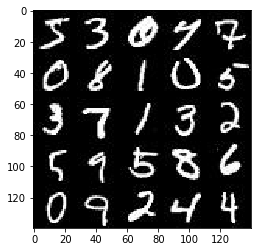

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

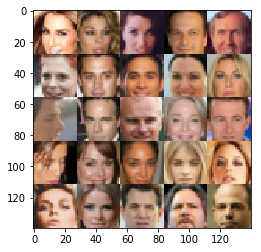

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [16]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_images = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))

    z_data = tf.placeholder(tf.float32, shape=(None, z_dim))

    learning_rate = tf.placeholder(tf.float32)

    return real_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [28]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    keep_prob = 0.9
    with tf.variable_scope('discriminator', reuse=reuse):

        print('disc.images.shape:', images.shape)
        d1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        d1 = tf.maximum(alpha * d1, d1)
        print('disc.image_layer1.shape:', d1.shape)
        # 16x16x32

        d2 = tf.layers.conv2d(d1, 128, 5, strides=2, padding='same')
        d2 = tf.layers.batch_normalization(d2, training=True)
        d2 = tf.maximum(alpha * d2, d2)
        d2 = tf.nn.dropout(d2, keep_prob=keep_prob)
        print('disc.image_layer2.shape:', d2.shape)
        # 8x8x128

        d3 = tf.layers.conv2d(d2, 256, 5, strides=2, padding='same')
        d3 = tf.layers.batch_normalization(d3, training=True)
        d3 = tf.maximum(alpha * d3, d3)
        d3 = tf.nn.dropout(d3, keep_prob=keep_prob)
        print('disc.image_layer3.shape:', d3.shape)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(d3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        print('disc.logits.shape:', logits.shape)
        print('disc.out.shape:', out.shape)

    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

disc.images.shape: (?, 28, 28, 3)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
disc.images.shape: (?, 28, 28, 3)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [29]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    reuse = not is_train
    keep_prob = 0.9
    stddev = 0.05
    with tf.variable_scope('generator', reuse=reuse):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        print('gen.x1.shape:', x1.shape)
        # 7x7x512 now

        x2 = tf.layers.conv2d_transpose(x1, 256, 5, kernel_initializer=tf.random_normal_initializer(stddev=stddev), strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        print('gen.x2.shape:', x2.shape)
        # 14x14x256 now

        x3 = tf.layers.conv2d_transpose(x2, 128, 5, kernel_initializer=tf.random_normal_initializer(stddev=stddev), strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        print('gen.x3.shape:', x3.shape)
        # 28x28x128

        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, kernel_initializer=tf.random_normal_initializer(stddev=stddev), strides=2, padding='same')
        #logits = tf.image.resize_images(logits, (28, 28))
        print('gen.logits.shape:', logits.shape)
        # 28x28xout_channel_dim

        out = tf.tanh(logits)

        return out

### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [27]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = .1
    
    g_model = generator(z=input_z, out_channel_dim=out_channel_dim)
    d_model_real, d_logits_real = discriminator(images=input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(images=g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_real, 
            labels = tf.ones_like(d_model_real) * (1 - smooth)
        )
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_fake,
            labels = tf.zeros_like(d_model_fake)
        )
    )
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_fake, 
            labels = tf.ones_like(d_model_fake)
        )
    )

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 4)
disc.images.shape: (?, 28, 28, 4)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
disc.images.shape: (?, 28, 28, 4)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [32]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [33]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [34]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)
    
    saver = tf.train.Saver()
    
    steps = 0
    total_steps = epoch_count * batch_size
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 10, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    # show samples
                    show_generator_output(sess, 10, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [35]:
batch_size = 64
z_dim = 64
learning_rate = .0004
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 1)
disc.images.shape: (?, 28, 28, 1)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
disc.images.shape: (?, 28, 28, 1)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)


KeyboardInterrupt: 

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)
disc.images.shape: (?, 28, 28, 3)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
disc.images.shape: (?, 28, 28, 3)
disc.image_layer1.shape: (?, 14, 14, 64)
disc.image_layer2.shape: (?, 7, 7, 128)
disc.image_layer3.shape: (?, 4, 4, 256)
disc.logits.shape: (?, 1)
disc.out.shape: (?, 1)
initial output:
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


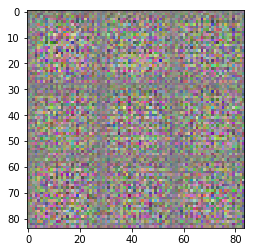

Epoch 1/1... Discriminator Loss: 0.6850... Generator Loss: 2.9957
Epoch 1/1... Discriminator Loss: 0.5595... Generator Loss: 5.0252
Epoch 1/1... Discriminator Loss: 0.5545... Generator Loss: 2.9124
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8746
Epoch 1/1... Discriminator Loss: 0.7414... Generator Loss: 1.9856
Epoch 1/1... Discriminator Loss: 0.6131... Generator Loss: 3.4028
Epoch 1/1... Discriminator Loss: 0.5174... Generator Loss: 2.3014
Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 2.7699
Epoch 1/1... Discriminator Loss: 0.4535... Generator Loss: 3.0729
Epoch 1/1... Discriminator Loss: 0.8984... Generator Loss: 1.1161
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


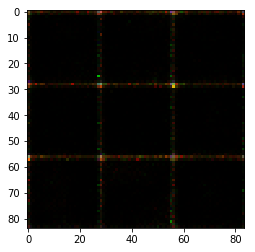

Epoch 1/1... Discriminator Loss: 0.6056... Generator Loss: 1.9730
Epoch 1/1... Discriminator Loss: 0.4004... Generator Loss: 3.6192
Epoch 1/1... Discriminator Loss: 0.5485... Generator Loss: 2.8290
Epoch 1/1... Discriminator Loss: 0.5230... Generator Loss: 2.4558
Epoch 1/1... Discriminator Loss: 0.5272... Generator Loss: 2.3077
Epoch 1/1... Discriminator Loss: 0.4660... Generator Loss: 2.5976
Epoch 1/1... Discriminator Loss: 0.3886... Generator Loss: 3.9132
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 0.9946
Epoch 1/1... Discriminator Loss: 0.4962... Generator Loss: 2.4598
Epoch 1/1... Discriminator Loss: 0.3885... Generator Loss: 4.2979
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


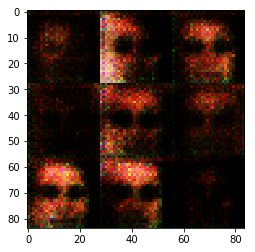

Epoch 1/1... Discriminator Loss: 0.4097... Generator Loss: 3.5142
Epoch 1/1... Discriminator Loss: 0.3924... Generator Loss: 4.3564
Epoch 1/1... Discriminator Loss: 0.4745... Generator Loss: 2.6234
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 2.6589
Epoch 1/1... Discriminator Loss: 0.5795... Generator Loss: 3.1582
Epoch 1/1... Discriminator Loss: 0.4247... Generator Loss: 3.0608
Epoch 1/1... Discriminator Loss: 1.6093... Generator Loss: 5.0487
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 1.8007
Epoch 1/1... Discriminator Loss: 0.5340... Generator Loss: 2.0362
Epoch 1/1... Discriminator Loss: 0.4192... Generator Loss: 3.1607
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


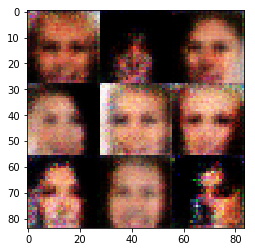

Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.5614
Epoch 1/1... Discriminator Loss: 0.4839... Generator Loss: 3.2093
Epoch 1/1... Discriminator Loss: 1.0277... Generator Loss: 4.3393
Epoch 1/1... Discriminator Loss: 0.7717... Generator Loss: 1.3730
Epoch 1/1... Discriminator Loss: 0.8493... Generator Loss: 4.2647
Epoch 1/1... Discriminator Loss: 0.5688... Generator Loss: 1.9059
Epoch 1/1... Discriminator Loss: 0.5192... Generator Loss: 2.8422
Epoch 1/1... Discriminator Loss: 2.1366... Generator Loss: 6.2885
Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.0417
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


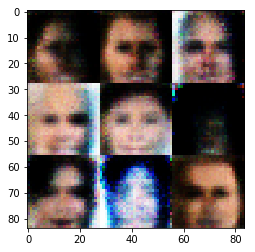

Epoch 1/1... Discriminator Loss: 0.5756... Generator Loss: 1.9316
Epoch 1/1... Discriminator Loss: 0.5782... Generator Loss: 2.0338
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 1.0503
Epoch 1/1... Discriminator Loss: 0.5999... Generator Loss: 3.9507
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 4.8662
Epoch 1/1... Discriminator Loss: 2.4317... Generator Loss: 5.9108
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.6627
Epoch 1/1... Discriminator Loss: 0.6922... Generator Loss: 2.5016
Epoch 1/1... Discriminator Loss: 0.5360... Generator Loss: 2.1607
Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 3.7991
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


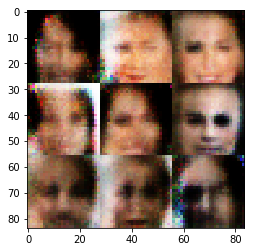

Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 1.0111
Epoch 1/1... Discriminator Loss: 0.7195... Generator Loss: 1.7209
Epoch 1/1... Discriminator Loss: 0.6983... Generator Loss: 2.2547
Epoch 1/1... Discriminator Loss: 0.6486... Generator Loss: 2.6494
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 0.8571... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 0.7239... Generator Loss: 2.5115
Epoch 1/1... Discriminator Loss: 0.8497... Generator Loss: 1.0511
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 3.3067
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.5124
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


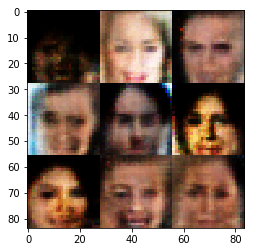

Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.4114
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 2.2266
Epoch 1/1... Discriminator Loss: 2.6710... Generator Loss: 4.8394
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 1.2386
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 2.2445
Epoch 1/1... Discriminator Loss: 0.8911... Generator Loss: 1.8818
Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 1.7709
Epoch 1/1... Discriminator Loss: 0.8720... Generator Loss: 1.1230
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


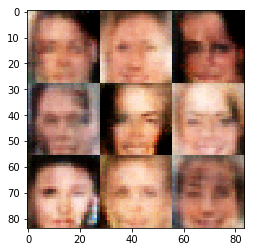

Epoch 1/1... Discriminator Loss: 2.1342... Generator Loss: 3.4630
Epoch 1/1... Discriminator Loss: 0.8711... Generator Loss: 1.6503
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 0.6509... Generator Loss: 2.0939
Epoch 1/1... Discriminator Loss: 0.8849... Generator Loss: 1.1574
Epoch 1/1... Discriminator Loss: 0.9465... Generator Loss: 3.3045
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 0.9715... Generator Loss: 1.8401
Epoch 1/1... Discriminator Loss: 0.7595... Generator Loss: 1.7720
Epoch 1/1... Discriminator Loss: 0.8205... Generator Loss: 1.2340
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


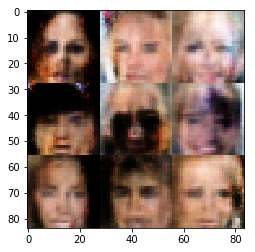

Epoch 1/1... Discriminator Loss: 1.1483... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.1665
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 0.8619
Epoch 1/1... Discriminator Loss: 0.7414... Generator Loss: 1.2310
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 1.2099
Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 1.3974
Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 1.7594
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 1.1153
Epoch 1/1... Discriminator Loss: 1.5400... Generator Loss: 2.3646
Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.9115
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


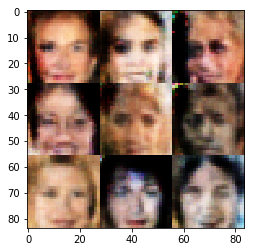

Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.3183
Epoch 1/1... Discriminator Loss: 1.9647... Generator Loss: 3.3510
Epoch 1/1... Discriminator Loss: 0.8724... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 0.9743... Generator Loss: 2.4221
Epoch 1/1... Discriminator Loss: 0.8633... Generator Loss: 1.2370
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.3049
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 0.7579... Generator Loss: 1.7816
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.4952
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 1.5935
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


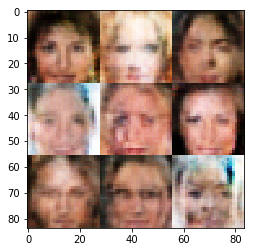

Epoch 1/1... Discriminator Loss: 0.8732... Generator Loss: 1.4055
Epoch 1/1... Discriminator Loss: 0.8012... Generator Loss: 1.6945
Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 1.7034
Epoch 1/1... Discriminator Loss: 0.9991... Generator Loss: 1.6033
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 2.2496
Epoch 1/1... Discriminator Loss: 0.9945... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 0.7286... Generator Loss: 1.5381
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 1.8684
Epoch 1/1... Discriminator Loss: 1.6415... Generator Loss: 0.3989
Epoch 1/1... Discriminator Loss: 0.9126... Generator Loss: 1.1152
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


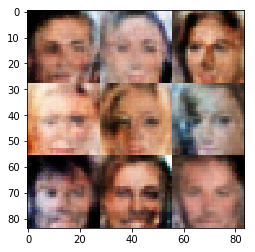

Epoch 1/1... Discriminator Loss: 0.8037... Generator Loss: 1.3395
Epoch 1/1... Discriminator Loss: 0.8390... Generator Loss: 1.1341
Epoch 1/1... Discriminator Loss: 1.1010... Generator Loss: 0.7260
Epoch 1/1... Discriminator Loss: 2.9340... Generator Loss: 4.0001
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.8747
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 2.7574
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 1.3769
Epoch 1/1... Discriminator Loss: 0.8216... Generator Loss: 1.3690
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 0.9571
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


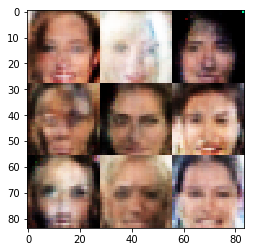

Epoch 1/1... Discriminator Loss: 1.7401... Generator Loss: 3.2151
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 1.0201... Generator Loss: 1.6824
Epoch 1/1... Discriminator Loss: 0.8192... Generator Loss: 2.6130
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 0.9803
Epoch 1/1... Discriminator Loss: 1.6080... Generator Loss: 0.3727
Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 2.1211
Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 1.1953
Epoch 1/1... Discriminator Loss: 0.9512... Generator Loss: 2.3110
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 0.8365
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


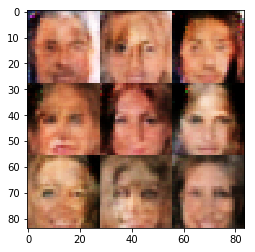

Epoch 1/1... Discriminator Loss: 0.8546... Generator Loss: 1.3407
Epoch 1/1... Discriminator Loss: 1.6643... Generator Loss: 0.4159
Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 0.8088... Generator Loss: 1.8539
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 1.1415... Generator Loss: 2.1521
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.4233
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 1.9882
Epoch 1/1... Discriminator Loss: 0.7615... Generator Loss: 2.0198
Epoch 1/1... Discriminator Loss: 0.8876... Generator Loss: 1.1500
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


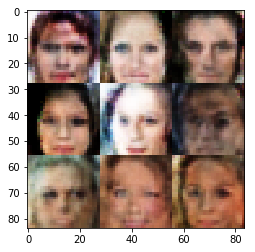

Epoch 1/1... Discriminator Loss: 0.9879... Generator Loss: 1.1338
Epoch 1/1... Discriminator Loss: 1.2169... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.6094
Epoch 1/1... Discriminator Loss: 0.9136... Generator Loss: 1.8280
Epoch 1/1... Discriminator Loss: 0.8450... Generator Loss: 1.3696
Epoch 1/1... Discriminator Loss: 0.8319... Generator Loss: 1.3712
Epoch 1/1... Discriminator Loss: 0.8894... Generator Loss: 1.0935
Epoch 1/1... Discriminator Loss: 1.0156... Generator Loss: 1.0863
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


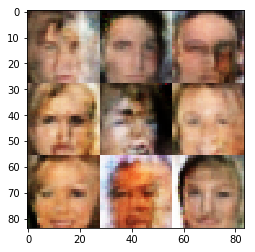

Epoch 1/1... Discriminator Loss: 0.9949... Generator Loss: 1.2621
Epoch 1/1... Discriminator Loss: 0.8175... Generator Loss: 1.5171
Epoch 1/1... Discriminator Loss: 0.9278... Generator Loss: 1.5577
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 2.3981
Epoch 1/1... Discriminator Loss: 1.8707... Generator Loss: 0.3197
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 1.4043
Epoch 1/1... Discriminator Loss: 1.0350... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 1.0231
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 1.3170
Epoch 1/1... Discriminator Loss: 0.8442... Generator Loss: 1.3030
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


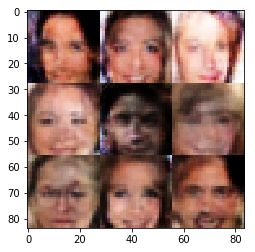

Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3302
Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 0.8597... Generator Loss: 1.3444
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 2.0624
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 1.1357
Epoch 1/1... Discriminator Loss: 0.9099... Generator Loss: 1.8313
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 0.8477
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.6186
Epoch 1/1... Discriminator Loss: 0.9871... Generator Loss: 1.0052
Epoch 1/1... Discriminator Loss: 0.8562... Generator Loss: 1.2971
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


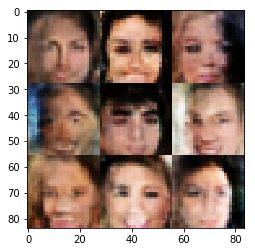

Epoch 1/1... Discriminator Loss: 1.2834... Generator Loss: 1.3578
Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 1.1267
Epoch 1/1... Discriminator Loss: 0.9734... Generator Loss: 1.0088
Epoch 1/1... Discriminator Loss: 1.0618... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 0.8431... Generator Loss: 1.1855
Epoch 1/1... Discriminator Loss: 1.1853... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 1.1560... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.0192... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.0662... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.5383
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


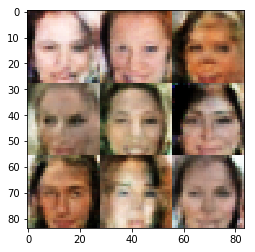

Epoch 1/1... Discriminator Loss: 0.9441... Generator Loss: 1.0038
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 2.3041
Epoch 1/1... Discriminator Loss: 0.9404... Generator Loss: 1.2987
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 1.9431
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 1.8705
Epoch 1/1... Discriminator Loss: 1.6218... Generator Loss: 0.3673
Epoch 1/1... Discriminator Loss: 1.2643... Generator Loss: 0.6059
Epoch 1/1... Discriminator Loss: 1.6171... Generator Loss: 0.4007
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 1.0241
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 0.7507
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


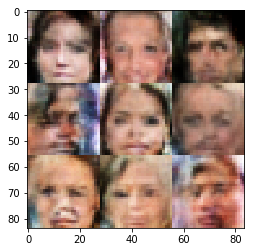

Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 0.9614
Epoch 1/1... Discriminator Loss: 1.2151... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 0.8536... Generator Loss: 1.2121
Epoch 1/1... Discriminator Loss: 3.0864... Generator Loss: 4.0087
Epoch 1/1... Discriminator Loss: 0.9436... Generator Loss: 1.0910
Epoch 1/1... Discriminator Loss: 1.2632... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 0.8209... Generator Loss: 1.5348
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 2.0773
Epoch 1/1... Discriminator Loss: 0.8435... Generator Loss: 1.7108
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


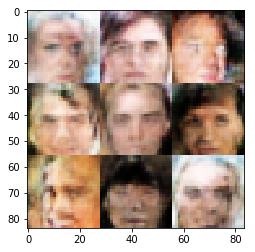

Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 0.9718
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.5928... Generator Loss: 2.8969
Epoch 1/1... Discriminator Loss: 0.8720... Generator Loss: 1.5727
Epoch 1/1... Discriminator Loss: 0.8898... Generator Loss: 1.2879
Epoch 1/1... Discriminator Loss: 2.7541... Generator Loss: 3.6563
Epoch 1/1... Discriminator Loss: 0.9818... Generator Loss: 1.2813
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.9827
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 1.1123
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


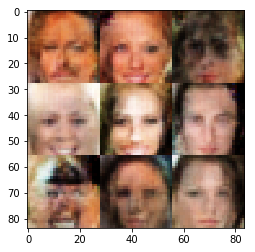

Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 1.0005
Epoch 1/1... Discriminator Loss: 0.7785... Generator Loss: 1.4203
Epoch 1/1... Discriminator Loss: 0.9117... Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 0.9579... Generator Loss: 1.1451
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 1.1695
Epoch 1/1... Discriminator Loss: 0.9047... Generator Loss: 1.0713
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 1.0730
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 1.0535
Epoch 1/1... Discriminator Loss: 0.8494... Generator Loss: 1.5427
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


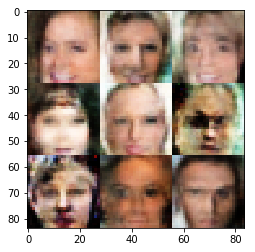

Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 1.7244
Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 0.8995
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.1420... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 0.8487... Generator Loss: 1.8426
Epoch 1/1... Discriminator Loss: 0.6421... Generator Loss: 1.5713
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.9718
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 1.0558
Epoch 1/1... Discriminator Loss: 0.8788... Generator Loss: 2.0534
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


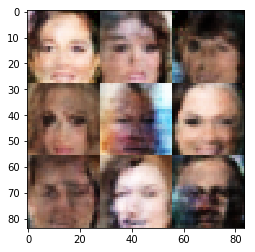

Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.0928... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 0.7708... Generator Loss: 2.0200
Epoch 1/1... Discriminator Loss: 0.9406... Generator Loss: 0.9150
Epoch 1/1... Discriminator Loss: 0.8353... Generator Loss: 2.7986
Epoch 1/1... Discriminator Loss: 1.0180... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 1.6535... Generator Loss: 2.5102
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 2.3518
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.8039
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


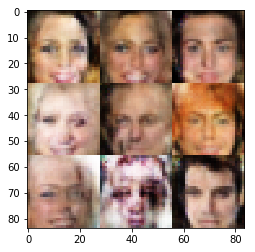

Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 1.8496
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.6865
Epoch 1/1... Discriminator Loss: 0.9388... Generator Loss: 1.5788
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 1.6309
Epoch 1/1... Discriminator Loss: 1.5486... Generator Loss: 0.4541
Epoch 1/1... Discriminator Loss: 1.0904... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.1552
Epoch 1/1... Discriminator Loss: 0.8771... Generator Loss: 1.4853
Epoch 1/1... Discriminator Loss: 0.8991... Generator Loss: 1.2781
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


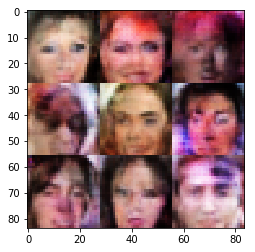

Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.9353
Epoch 1/1... Discriminator Loss: 0.9591... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 0.6071
Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 2.6390
Epoch 1/1... Discriminator Loss: 1.1282... Generator Loss: 1.1299
Epoch 1/1... Discriminator Loss: 1.0337... Generator Loss: 1.0025
Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 1.4090
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


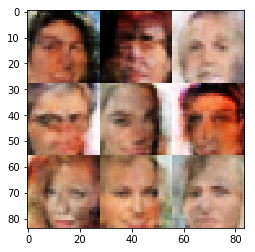

Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 1.6021
Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 1.1868
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 1.5156
Epoch 1/1... Discriminator Loss: 0.9927... Generator Loss: 1.5293
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 0.9418... Generator Loss: 1.4887
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.5180
Epoch 1/1... Discriminator Loss: 0.7623... Generator Loss: 1.4090
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


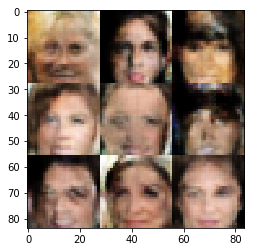

Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.4635
Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 1.8964
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 0.8267... Generator Loss: 1.3257
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 0.7068
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 1.6805
Epoch 1/1... Discriminator Loss: 0.9551... Generator Loss: 1.9896
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 0.9452
Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 1.5970
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


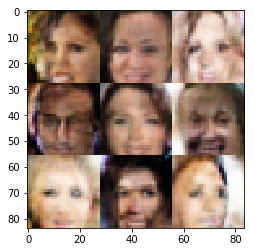

Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.5190
Epoch 1/1... Discriminator Loss: 1.1814... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 0.7733... Generator Loss: 1.3500
Epoch 1/1... Discriminator Loss: 1.3362... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.4991... Generator Loss: 1.0735
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.7670
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 1.5061
Epoch 1/1... Discriminator Loss: 1.0412... Generator Loss: 0.8192
Epoch 1/1... Discriminator Loss: 0.8543... Generator Loss: 1.1420
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 0.8680
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


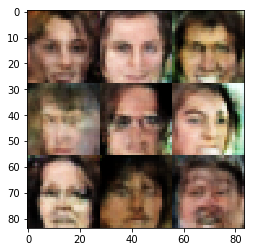

Epoch 1/1... Discriminator Loss: 1.7445... Generator Loss: 2.8064
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 2.1054
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 1.5965
Epoch 1/1... Discriminator Loss: 0.8202... Generator Loss: 1.7400
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 2.7487
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 1.1281
Epoch 1/1... Discriminator Loss: 1.5142... Generator Loss: 0.4703
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.5591
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


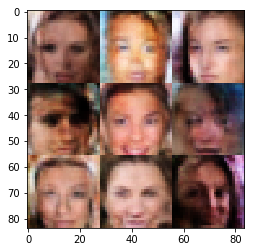

Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 2.2338
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 1.2502
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 0.8230... Generator Loss: 1.3039
Epoch 1/1... Discriminator Loss: 0.8655... Generator Loss: 1.2040
Epoch 1/1... Discriminator Loss: 0.9224... Generator Loss: 1.0465
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 0.9870... Generator Loss: 1.7242
gen.x1.shape: (?, 7, 7, 512)
gen.x2.shape: (?, 14, 14, 256)
gen.x3.shape: (?, 14, 14, 128)
gen.logits.shape: (?, 28, 28, 3)


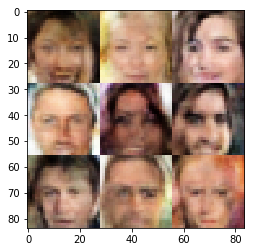

Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 1.0038
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 1.0319
Epoch 1/1... Discriminator Loss: 0.7866... Generator Loss: 1.7304
Epoch 1/1... Discriminator Loss: 0.9296... Generator Loss: 1.2007
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.0608... Generator Loss: 0.8347


In [36]:
batch_size = 64
z_dim = 128
learning_rate = 0.0004
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.